# Renovation Strategies for Home Value Growth

## Final Project Submission

Please fill out:
* Student name: Matilda Odalo, Mark Bundi, Charles Kagwanja, Wycliffe Orimba
* Student pace:  part time 
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL: https://github.com/MarkusPinto/dsc-phase-2-project-v2-3.git

## Business Problem

In this context, the business challenge revolves around offering stakeholders a tailored guidance for enhancing the assessed value of their residences through strategic renovation initiatives. The primary objective is to respond to the following inquiry: "Which precise renovation projects and strategies can be statistically substantiated as yielding the most substantial positive influence on the estimated worth of residential properties, and how can these insights be translated into actionable recommendations for stakeholders?" To attain this goal, the analysis will employ Linear Regression models, which will be iteratively refined from an initial baseline model, ultimately leading to the selection of an optimal final model.

## Data Understanding

This project uses the King County House Sales dataset, which can be found in kc_house_data.csv in the data folder in this assignment's GitHub repository. The description of the column names can be found in column_names.md.

The data has six non-numeric columns that include: "date", "waterfront", "view", "condition", "grade", and "sqft_basement" that will be used in the analysis.

In [54]:
#importing necessary libraries

import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import datetime as dt
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [55]:
#reading data
df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [58]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [4]:
#Viewing summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

The data has six non-numeric columns that will need to be manipulated or removed before regression analysis: "date", "waterfront", "view", "condition", "grade", and "sqft_basement"

We are dropping certain columns that we won't be using in our model.

In [59]:
#columns dropped
cols = ['date', 'id', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'view', 'zipcode', 'yr_built']
df = df.drop(cols, axis=1)

In [60]:
#Looking at the unique values in the columns
for col in df.columns:
    print(df[col].value_counts())

350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 3622, dtype: int64
3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64
2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64
1300    138
1400    135
1440    133
1660    129
1010    129
       ... 
4970      1
2905      1
2793      1
4810      1
1975      1
Name: sqft_living, Length: 1034, dtype: int64
5000      358
6000      290
4000      

## Data Preparation

### Dealing with missing values

Waterfront and years renovated have missing values

In [61]:
#viewing new data summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     19221 non-null  object 
 7   condition      21597 non-null  object 
 8   grade          21597 non-null  object 
 9   sqft_above     21597 non-null  int64  
 10  sqft_basement  21597 non-null  object 
 11  yr_renovated   17755 non-null  float64
dtypes: float64(4), int64(4), object(4)
memory usage: 2.0+ MB


In [62]:
#columns with missing values are waterfront, yr_renovated
df.isna().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_renovated     3842
dtype: int64

In [63]:
#checking unique values in waterfront
df['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [64]:
#filling the null values with 0 assuming that the houses did not have a waterfront
df['waterfront'].fillna(0, inplace=True)

In [65]:
#checking unique values in yr_renovated
df['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [66]:
#filling null values with 0
df['yr_renovated'].fillna(0, inplace=True)

In [67]:
#Checking if the code worked
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_renovated     0
dtype: int64

### Converting datatypes

We transformed the variables "waterfront" and "yr_renovated" into binary format, where the value 0 signifies the absence of a waterfront and the fact that the house has never been renovated, while the value 1 indicates both waterfront presence and renovation.

In [68]:
#convert data for analysis
df['waterfront'] = [1 if x=='YES' else 0 for x in df['waterfront']]
df['yr_renovated'] = [0 if x == 0.0 else 1 for x in df['yr_renovated']]

In [69]:
df['waterfront'].value_counts()

0    21451
1      146
Name: waterfront, dtype: int64

In [70]:
df['yr_renovated'].value_counts()

0    20853
1      744
Name: yr_renovated, dtype: int64

In [17]:
#Dealing with the categorical column condition
df['condition'].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

In [18]:
#Making a dict to map to the string in the categorical column condition
cond = {'Very Good':5, "Good": 4,'Average': 3, "Fair": 2, "Poor": 1}
#Creating a new column which the mapping will be done
df['condition_num'] = df['condition'].map(cond)
df.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_renovated,condition_num
0,221900.0,3,1.00,1180,5650,1.0,0,Average,7 Average,1180,0.0,0,3
1,538000.0,3,2.25,2570,7242,2.0,0,Average,7 Average,2170,400.0,1,3


In [19]:
df['grade'].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [20]:
# A function to split the grade column to a  grade number and grade name.
def split_grade(grade):
  grade_num = grade.split(' ')[0]
  grade_name = grade.split(' ')[1]

  return int(grade_num), grade_name


df['grade_num'], df['grade_name'] = zip(*df['grade'].apply(split_grade))

df.head(2)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_renovated,condition_num,grade_num,grade_name
0,221900.0,3,1.00,1180,5650,1.0,0,Average,7 Average,1180,0.0,0,3,7,Average
1,538000.0,3,2.25,2570,7242,2.0,0,Average,7 Average,2170,400.0,1,3,7,Average


In [21]:
#dropping condion and grade columns
df = df.drop(columns=['condition', 'grade'])
df.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_renovated,condition_num,grade_num,grade_name
0,221900.0,3,1.00,1180,5650,1.0,0,1180,0.0,0,3,7,Average
1,538000.0,3,2.25,2570,7242,2.0,0,2170,400.0,1,3,7,Average


### Outliers

When we ran the value_counts to check the unique values in all the columns, it was noted that there was a house with 33 bedrooms. We want to check if it makes sense.

In [22]:
#sort data to identify outliers
df.sort_values(by='bedrooms')

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_renovated,condition_num,grade_num,grade_name
9877,713000.0,1,1.00,1180,4000,1.5,0,840,340.0,0,4,8,Good
9536,190000.0,1,1.00,720,4800,1.0,0,720,0.0,0,3,6,Low
14332,321500.0,1,1.00,730,1942,1.0,0,730,0.0,0,3,7,Average
14340,325000.0,1,1.00,1220,12426,1.0,0,1220,0.0,0,4,6,Low
12823,305000.0,1,1.00,900,7500,1.0,0,900,0.0,0,3,5,Fair
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15147,650000.0,10,2.00,3610,11914,2.0,0,3010,600.0,0,4,7,Average
13301,1150000.0,10,5.25,4590,10920,1.0,0,2500,2090.0,0,3,9,Better
19239,660000.0,10,3.00,2920,3745,2.0,0,1860,1060.0,0,4,7,Average
8748,520000.0,11,3.00,3000,4960,2.0,0,2400,600.0,1,3,7,Average


The house with 33 bedrooms is having square footage of living being 1620. It does not make sense to include the outlier.

In [23]:
df = df.loc[(df['bedrooms'] != 33)]
df.sort_values(by='bedrooms')

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_renovated,condition_num,grade_num,grade_name
9877,713000.0,1,1.00,1180,4000,1.5,0,840,340.0,0,4,8,Good
9536,190000.0,1,1.00,720,4800,1.0,0,720,0.0,0,3,6,Low
14332,321500.0,1,1.00,730,1942,1.0,0,730,0.0,0,3,7,Average
14340,325000.0,1,1.00,1220,12426,1.0,0,1220,0.0,0,4,6,Low
12823,305000.0,1,1.00,900,7500,1.0,0,900,0.0,0,3,5,Fair
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,700000.0,9,3.00,3680,4400,2.0,0,2830,850.0,0,3,7,Average
19239,660000.0,10,3.00,2920,3745,2.0,0,1860,1060.0,0,4,7,Average
15147,650000.0,10,2.00,3610,11914,2.0,0,3010,600.0,0,4,7,Average
13301,1150000.0,10,5.25,4590,10920,1.0,0,2500,2090.0,0,3,9,Better


We tried convert the datatype of the sqf_basement column but an error occured stating could not convert string to float: '?'. Meaning some values are missing.The decision was to make another column that included values gotten from deducting sqft_above from sqft_living. We then filled the column with binary values 0 and 1, 0 representing houses without a basement and 1 with those with a basement.

In [24]:
#dropping original column
df = df.drop('sqft_basement', axis=1)

In [25]:
#The new column
df['sqft_basement'] = df['sqft_living'] - df['sqft_above']
df.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,yr_renovated,condition_num,grade_num,grade_name,sqft_basement
0,221900.0,3,1.00,1180,5650,1.0,0,1180,0,3,7,Average,0
1,538000.0,3,2.25,2570,7242,2.0,0,2170,1,3,7,Average,400


In [26]:
#Converting sqft_basement to binary format
df['sqft_basement'] = df['sqft_basement'].apply(lambda x: 0 if x == 0 else 1)
df['sqft_basement'].value_counts()

0    13110
1     8486
Name: sqft_basement, dtype: int64

In [27]:
df.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,yr_renovated,condition_num,grade_num,grade_name,sqft_basement
0,221900.0,3,1.00,1180,5650,1.0,0,1180,0,3,7,Average,0
1,538000.0,3,2.25,2570,7242,2.0,0,2170,1,3,7,Average,1


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21596 non-null  float64
 1   bedrooms       21596 non-null  int64  
 2   bathrooms      21596 non-null  float64
 3   sqft_living    21596 non-null  int64  
 4   sqft_lot       21596 non-null  int64  
 5   floors         21596 non-null  float64
 6   waterfront     21596 non-null  int64  
 7   sqft_above     21596 non-null  int64  
 8   yr_renovated   21596 non-null  int64  
 9   condition_num  21596 non-null  int64  
 10  grade_num      21596 non-null  int32  
 11  grade_name     21596 non-null  object 
 12  sqft_basement  21596 non-null  int64  
dtypes: float64(3), int32(1), int64(8), object(1)
memory usage: 2.2+ MB


This is how we categorised our metrics:

categorical data: yr_renovated, waterfront,condition_num, grade_num,sqft_basement.

continuous data: price, sqft_living, sqft_above, sqft_lot, floors, bedrooms, bathrooms.



In [29]:
final_df = df.drop(columns='grade_name')
final_df.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,yr_renovated,condition_num,grade_num,sqft_basement
0,221900.0,3,1.00,1180,5650,1.0,0,1180,0,3,7,0
1,538000.0,3,2.25,2570,7242,2.0,0,2170,1,3,7,1


We will now check for the distribution in each column including the price column as well as the correlation between the variables.

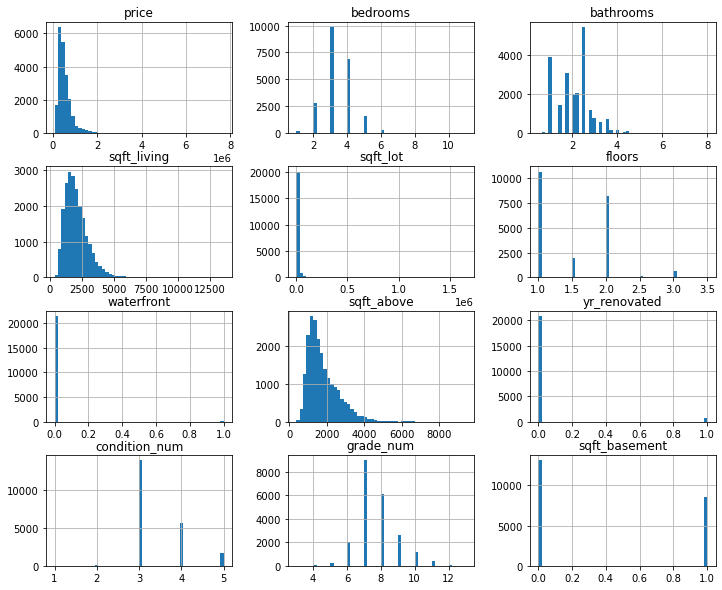

In [30]:
hist = final_df.hist(bins=50,figsize  = [12, 10])
# Create a Matplotlib figure object
fig = plt.gcf()

# Save the figure to a file (e.g., in PNG format)
fig.savefig("./images/distribution.png")

# Optionally, display the figure
plt.show()

### Observation
The data is not normally distributed and may indicate presence of outliers. This will be dealt with during modeling.

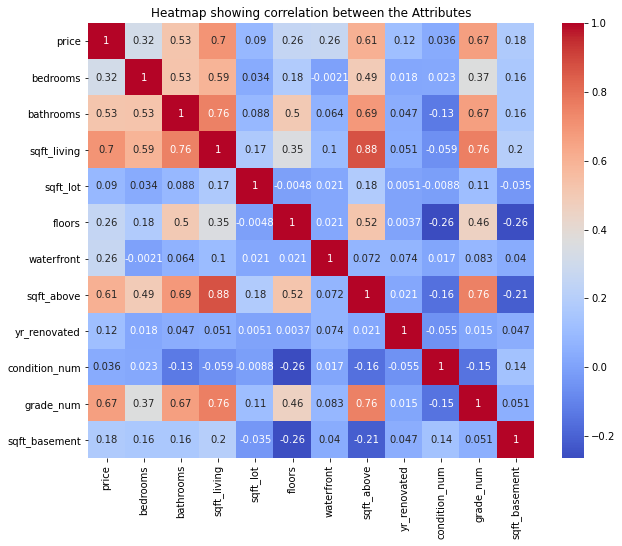

In [31]:
fig, ax = plt.subplots(figsize=(10, 8), facecolor='white')
corr = final_df.corr()
sns.heatmap(data=corr, ax=ax, cmap='coolwarm', annot=True)
plt.savefig(fname='./images/correlation.png', facecolor='white')
ax.set_title('Heatmap showing correlation between the Attributes');

### Observations

The above Heatmap is just to show us how the independent variables are correlated with the dependent variable(price).
sqft_living has a high positive correlation with price being 0.7 while condition_num has a low positive correlation with the price.


We plotted regplots to conduct Linearity checks for the continuous that includes mostly the square footage data that will help us in spotting multicollinearity.

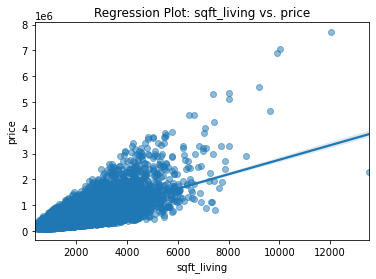

In [32]:
# Choose the two or more continuous variables to plot (e.g., 'sqft_living' vs. 'price')
x_variable = 'sqft_living'
y_variable = 'price'

# Create a regression plot
sns.regplot(data=final_df, x=x_variable, y=y_variable, scatter_kws={"alpha":0.5})

# Add labels and title
plt.xlabel(x_variable)
plt.ylabel(y_variable)
plt.title(f'Regression Plot: {x_variable} vs. {y_variable}')

#save the figure
plt.savefig(fname='./images/sqf_liv.png', facecolor='white')

# Show the plot
plt.show()

We note that sqft_living has a high positive correlation with the price. This means that the high the square footage of living the higher the price.

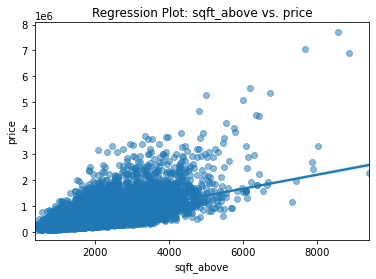

In [33]:
# Choose the two continuous variables to plot
x_variable = 'sqft_above'
y_variable = 'price'

# Create a regression plot
sns.regplot(data=final_df, x=x_variable, y=y_variable, scatter_kws={"alpha":0.5})

# Add labels and title
plt.xlabel(x_variable)
plt.ylabel(y_variable)
plt.title(f'Regression Plot: {x_variable} vs. {y_variable}')

#save figure 
plt.savefig(fname='./images/sqft_above.png', facecolor='white')

# Show the plot
plt.show()

From the above regression plot, we note that sqft_above has a moderate correlaton with the price. As the value of sqft_above increases, there is a moderate increase in price.

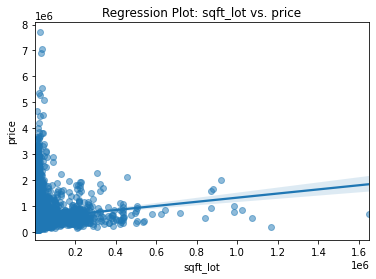

In [34]:
# Choose the two continuous variables to plot
x_variable = 'sqft_lot'
y_variable = 'price'

# Create a regression plot
sns.regplot(data=final_df, x=x_variable, y=y_variable, scatter_kws={"alpha":0.5})

# Add labels and title
plt.xlabel(x_variable)
plt.ylabel(y_variable)
plt.title(f'Regression Plot: {x_variable} vs. {y_variable}')

#Save figure 
plt.savefig(fname='./images/sqft_lot.png', facecolor='white')

# Show the plot
plt.show()

From the above, there is a low positive correlation between sqft_lot and the price. This means an increase in sqft_lot values has a minimum effect on the price.

In [35]:
#Multicollinearity theshold corr>=0.75
cont=['sqft_lot', 'sqft_living','sqft_above']
corr_cont = df[cont].corr()
corr_cont

,sqft_lot,sqft_living,sqft_above
sqft_lot,1.000000,0.173449,0.184134
sqft_living,0.173449,1.000000,0.876448
sqft_above,0.184134,0.876448,1.000000


We note that sqft_living and sqft_above have high correlation between each other. We decide to drop sqft-above to avoid multicollinearity issues.

In [36]:
# Our final df that will be used in modeling.
final_df.drop(columns = 'sqft_above', inplace=True)
y = final_df['price']
x = final_df.drop(columns='price')

In [37]:
#Print column names
print("Dependent variable y:" , 'price')
print("Independent variables x:", x.columns.tolist())

Dependent variable y: price
Independent variables x: ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'yr_renovated', 'condition_num', 'grade_num', 'sqft_basement']


## Modelling

### Baseline Model

The baseline model is a simple model  used to contextualize the results of trained models. We create the basiline model to provide a reference point for measuring the performance of other models. We start with a simpler model as our base and work through it to make a much better base. In this instance we used y = price as the dependent variable and square foot living independent varible

In [38]:
#independent varible
x_base = df['sqft_living']

In [39]:
#Add a constant term to the features for OLS
x_base= sm.add_constant(x_base)
# Fit an OLS model
model = sm.OLS(y, x_base).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Sun, 10 Sep 2023   Prob (F-statistic):               0.00
Time:                        19:27:29   Log-Likelihood:            -3.0005e+05
No. Observations:               21596   AIC:                         6.001e+05
Df Residuals:                   21594   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.401e+04   4410.123     -9.980      

## Interpretation
#### R-squared value: 0.493
Interpretation: The model explains approximately 49.3% of the variability in house prices.

#### Coefficient value for "sqft_living": 280.8688 dollars
Interpretation: For each additional square foot of living space, we expect the house price to increase by approximately $280.87, holding other variables constant.

#### P-value for "sqft_living": 0.0
Interpretation: The p-value suggests that the "sqft_living" variable has a statistically significant impact on house prices in the model.

#### Kurtosis value: 26.901
Interpretation: The distribution of residuals has heavy tails, indicating the presence of outliers.

#### Skewness value: 2.820
Interpretation: The distribution of residuals is positively skewed, suggesting a tail on the right side, which may be due to outliers or nonlinearity in the model.0

### Model 1 - Including all other Predictors.

We wil try to see if by including more variables the model will improve.

In [40]:
# Split the data into training and testing sets (e.g., 80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (17276, 10)
x_test shape: (4320, 10)
y_train shape: (17276,)
y_test shape: (4320,)


In [41]:
#Training the Algorithm
#Add a constant term to the features for OLS
x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

# Fit an OLS model
model = sm.OLS(y_train, x_train).fit()

# Calculate predictions on training and testing sets
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

# Calculate RMSE for training and testing sets
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Print the RMSE values and model summary
print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
print(model.summary())

Train RMSE: 232918.7227706819
Test RMSE: 229101.33873950972
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     2600.
Date:                Sun, 10 Sep 2023   Prob (F-statistic):               0.00
Time:                        19:27:29   Log-Likelihood:            -2.3802e+05
No. Observations:               17276   AIC:                         4.761e+05
Df Residuals:                   17265   BIC:                         4.761e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

## Interpretation.

~ R-squared value: 0.601
Interpretation: The model explains approximately 60.1% of the variation in house prices, indicating a reasonably good fit for the independent variables.

~ Root Mean Square Error (RMSE):
RMSE for the training set: 232,918.7
RMSE for the test set: 229,101.3
Interpretation: The RMSE measures the average error in predicting house prices. The values suggest that the model's predictions have an average error of approximately 232,918.7 on the training set and 229,101.3 on the test set with a difference of $3,817.4. Lower RMSE values are desirable.

~ Skewness value: 2.942
Interpretation: The baseline model's predictions exhibit positive skewness, indicating a right-tailed distribution. This suggests that there may be a higher percentage of outliers in the dataset.

~ Kurtosis value: 34.037
Interpretation: The baseline model's predictions have high kurtosis, which indicates the presence of high outliers in the dataset. The distribution is heavy-tailed.

~ P-value for "Floor" variable: 0.418
Interpretation: The p-value for the "Floor" variable is greater than the significance level (alpha) of 0.05, indicating that it is not statistically significant in explaining variations in house prices. In other words, "Floor" is an insignificant feature in the model.

In [42]:
# Update qq_plot function to save fig
def qq_plot(model, save_path=None):

    fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 6))

    ax0.hist(model.resid)
    ax0.set(xlabel='Residual', ylabel='Frequency', title='Distribution of Residuals')

    sm.qqplot(model.resid, stats.t, fit=True, line="45", ax=ax1)
    ax1.set(title='QQ Plot')

    fig.suptitle('Normality of Residuals')
    
    if save_path:
        # Save the figure to the specified path (e.g., in PNG format)
        fig.savefig(save_path)

    fig.show()

    return qq_plot

<ipython-input-42-3d7cef8ca229>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<function __main__.qq_plot(model, save_path=None)>

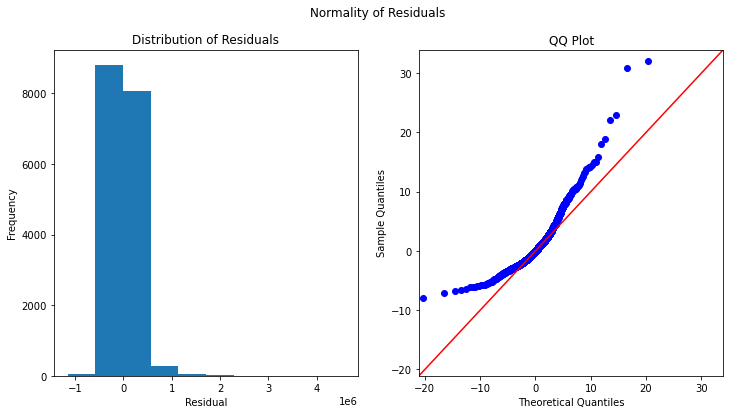

In [43]:
qq_plot(model, save_path="./images/model_qq_plot.png")

### Observation
According to the Q&Q plot above, the residuals are not normally distributed.


In [44]:
#let's compare our predicted results to the actual data from the test set:
y_test_array = y_test.to_numpy()
y_pred_array = y_test_pred.to_numpy()
# Compare actual and predicted values
comparison_frame = pd.DataFrame({'Actual': y_test_array.flatten(), 'Predicted': y_pred_array.flatten()})

# Now you can describe the comparison_frame
comparison_frame.describe()

,Actual,Predicted
count,4.320000e+03,4.320000e+03
mean,5.366478e+05,5.404115e+05
std,3.619991e+05,2.838553e+05
min,8.300000e+04,-2.265510e+05
25%,3.199500e+05,3.504784e+05
50%,4.500000e+05,4.857550e+05
75%,6.400000e+05,6.754477e+05
max,7.060000e+06,3.310035e+06


The model did not do quite a great job in predicting the values. The next step is to remove outliers in the model.

## Model 2 - Removing Outliers

We have chosen to apply the Tukey method for outlier detection and removal in our dataset, which comprises a mix of both categorical and numeric data. This method is particularly valuable for our analysis due to its ability to effectively identify and address outliers in the numeric variables. By doing so, we aim to preserve data integrity and minimize the impact of extreme values on our statistical analyses and modeling processes. 

In [45]:
# Remove outliers from both X and y
def remove_outliers_tukey(X, y, threshold=1.5):
    # Calculate the IQR for y
    q25, q75 = np.percentile(y, [25, 75])
    iqr = q75 - q25

    # Identify the outliers for y
    y_outliers = (y < q25 - threshold * iqr) | (y > q75 + threshold * iqr)

    # Identify the outliers for each feature in X
    x_outliers = np.any((X < (q25 - threshold * iqr)) | (X > (q75 + threshold * iqr)), axis=1)

    # Combine the outlier masks for X and y
    outliers = x_outliers | y_outliers

    # Remove the outliers from both X and y
    X_clean = X[~outliers]
    y_clean = y[~outliers]

    return X_clean, y_clean

In [46]:
#Remove outliers from both X and y
X_clean, y_clean = remove_outliers_tukey(x, y)

# Split the cleaned data into training and testing sets
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)
print(X_train_clean.shape)
print(X_test_clean.shape)
print(y_train_clean.shape)
print(y_test_clean.shape)

(16348, 10)
(4088, 10)
(16348,)
(4088,)


In [47]:
# Add a constant term to the features for OLS 
X_train_clean = sm.add_constant(X_train_clean)
X_test_clean = sm.add_constant(X_test_clean)

# Fit an OLS model using cleaned data
model_clean = sm.OLS(y_train_clean, X_train_clean).fit()

# Calculate predictions on training and testing sets for the cleaned model
y_train_pred_clean = model_clean.predict(X_train_clean)
y_test_pred_clean = model_clean.predict(X_test_clean)

# Calculate RMSE for training and testing sets for the cleaned model
train_rmse_clean = np.sqrt(mean_squared_error(y_train_clean, y_train_pred_clean))
test_rmse_clean = np.sqrt(mean_squared_error(y_test_clean, y_test_pred_clean))

# Print RMSE values and model summaries for the cleaned model
print("Model with Outliers Removed - Train RMSE:", train_rmse_clean)
print("Model with Outliers Removed - Test RMSE:", test_rmse_clean)
print(model_clean.summary())


Model with Outliers Removed - Train RMSE: 146708.64419837348
Model with Outliers Removed - Test RMSE: 146903.4663359656
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     1651.
Date:                Sun, 10 Sep 2023   Prob (F-statistic):               0.00
Time:                        19:27:31   Log-Likelihood:            -2.1768e+05
No. Observations:               16348   AIC:                         4.354e+05
Df Residuals:                   16337   BIC:                         4.355e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
--------

### Interpretation.

#### R-squared value: 0.503
Interpretation: The model explains approximately 50.3% of the variation in the dependent variable prices. It has reduced compared to the first model.
#### Kurtosis value: 3.590
Interpretation: The kurtosis value of 3.590 suggests that the distribution of residuals (the differences between predicted and actual values) is moderately peaked, indicating that it has slightly heavier tails compared to a normal distribution. It implies the presence of some outliers, although they may not be extreme.This also indicates an improvement from the previous model which had a kurtosis of 34.037.
#### Skewness value: 0.522
Interpretation: The skewness value of 0.522 indicates a slight positive skew in the distribution of residuals, meaning that the distribution is somewhat skewed to the right. This suggests a slightly longer tail on the right side but does not imply a severe departure from normality. This ia also an improvement from the previous model which had a skew of 2.942.
#### Root Mean Square Error (RMSE):
RMSE for the model with outliers removed on the training set: 146,708.64
RMSE for the model with outliers removed on the test set: 146,903.47
Interpretation: These RMSE values represent the average error in predicting house prices. The lower the RMSE, the better the model's predictive accuracy. In this case, the model has an average error of approximately 146,708.64 on the training set and 146,903.47 on the test set, indicating that it provides reasonably accurate predictions.
#### P-value for the "sqft_lot" variable: 0.927
Interpretation: The p-value for "sqft_lot" is 0.927, which is much greater than the common significance level of 0.05. This suggests that the "sqft_lot" variable is statistically insignificant in explaining variations in house prices in the model. It is likely not a relevant predictor for house prices in this context.

<ipython-input-42-3d7cef8ca229>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<function __main__.qq_plot(model, save_path=None)>

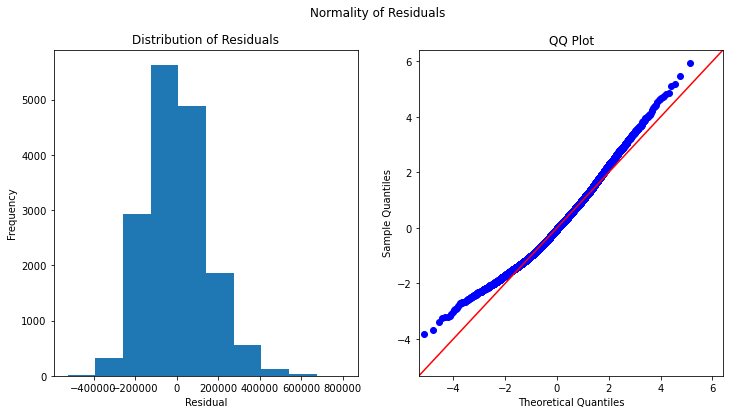

In [48]:
qq_plot(model_clean, save_path="./images/clean.png")

From the above we can see a significant improvemt in the distribution of outliers in comparison with the first model.
It still has some light tails that may be adjusted by the use of a Log Transformation.

## Model 3 - Log Transformation.

We will try to do a log transformation to normalize the data

In [49]:
# Function to normalize the data (Subtracting mean and divide by STD)
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

In [50]:
#Step 1: Log-transform the target variable
y_clean_log = np.log(y_clean)
data_cat = X_clean[['waterfront', 'yr_renovated', 'condition_num', 'grade_num', 'sqft_basement']]

X_clean_df = X_clean[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors']]
#log features
log_names = [f'{column}_log' for column in X_clean_df.columns]
X_clean_df= np.log(X_clean_df)

X_clean = X_clean.apply(normalize)
X_clean = pd.concat([X_clean_df, data_cat], axis=1)

In [51]:
# Step 2: Split the data into training and testing sets
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_clean, y_clean_log, test_size=0.2, random_state=42)

# Step 3: Add a constant term to the features for OLS
X_train_log = sm.add_constant(X_train_log)
X_test_log = sm.add_constant(X_test_log)

# Step 4: Fit an OLS model 
model_log = sm.OLS(y_train_log, X_train_log).fit()

# Step 5: Calculate predictions on training and testing sets
y_train_pred_log = model_log.predict(X_train_log)
y_test_pred_log = model_log.predict(X_test_log)

# Step 6: Calculate RMSE for training and testing sets
train_rmse_log = np.sqrt(mean_squared_error(y_train_log, y_train_pred_log))
test_rmse_log = np.sqrt(mean_squared_error(y_test_log, y_test_pred_log))

# Step 7: Print the RMSE values and model summary
print("Train RMSE:", train_rmse_log)
print("Test RMSE:", test_rmse_log)
print(model_log.summary())

Train RMSE: 0.3183210543467515
Test RMSE: 0.31652284300899786
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     1578.
Date:                Sun, 10 Sep 2023   Prob (F-statistic):               0.00
Time:                        19:27:32   Log-Likelihood:                -4483.3
No. Observations:               16348   AIC:                             8989.
Df Residuals:                   16337   BIC:                             9073.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

### Interpretation
#### R-squared value: 0.491
Interpretation: The model explains approximately 49.1% of the variation in the dependent variable (e.g., house prices). This indicates a moderate degree of explanatory power, similar to the previous model.
#### Kurtosis value: 2.910
Interpretation: The kurtosis value of 2.910 suggests that the distribution of residuals has moderately peaked tails, indicating some outliers but not extreme ones. It is slightly less peaked compared to the previous model's kurtosis.
#### Skewness value: -0.077
Interpretation: The skewness value of -0.077 indicates a slight negative skew in the distribution of residuals, suggesting a slight tail on the left side. This skew is less pronounced than the positive skew in the previous model's residuals.
#### Root Mean Square Error (RMSE):
RMSE for the model: 0.318 (Train) and 0.316 (Test)
Interpretation: These RMSE values represent the average error in predicting house prices. The lower the RMSE, the better the model's predictive accuracy. In this case, both the training and test RMSE values are relatively low (0.318 log dollars and 0.316 log dollars), indicating that the model provides reasonably accurate predictions, similar to the previous model's RMSE values.

0.318 (Training RMSE) - 0.316 (Test RMSE) ≈ 0.002 log-dollars

<ipython-input-42-3d7cef8ca229>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<function __main__.qq_plot(model, save_path=None)>

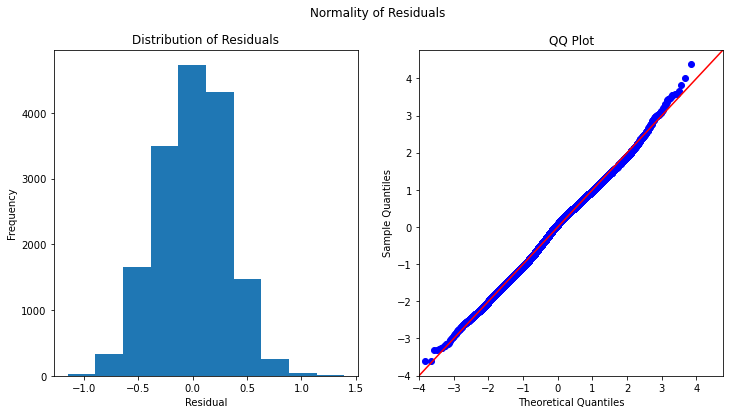

In [52]:
qq_plot(model_log, save_path="./images/log.png")

### Interpretation
The residual normality has significantly improved compared to previous models.
This model proves to be a better model than the others.

In [53]:
#let's compare our predicted results to the actual data from the test set:
y_test_array = y_test_log.to_numpy()
y_pred_array = y_test_pred_log.to_numpy()
# Compare actual and predicted values
comparison_frame = pd.DataFrame({'Actual': y_test_array.flatten(), 'Predicted': y_pred_array.flatten()})

# Now you can describe the comparison_frame
comparison_frame.describe()

,Actual,Predicted
count,4088.000000,4088.000000
mean,12.985551,12.979645
std,0.440926,0.309062
min,11.338572,11.691978
25%,12.676076,12.777906
50%,12.994530,12.968286
75%,13.307390,13.166854
max,13.928839,14.157895


This final model has demonstrated superior predictive performance and will serve as our definitive model for deriving recommendations.

## Conclusion

In conclusion, we have selected this final model as our preferred choice for deriving recommendations. Despite its lower R-squared value, it excels in terms of prediction accuracy and exhibits a more favorable residual distribution. These qualities make it a robust and practical tool for generating recommendations, as its predictions closely mirror real-world outcomes. This model, with its emphasis on accuracy and reliability, represents a valuable asset for addressing our business problem.

## Recomendations

### From the regression model we can interpret that features that improve household value:
#### Square footage of Living space:
Coefficient: 0.4583
Interpretation: For each additional square foot of living space in a house, we expect the house price to increase by approximately $458.30, holding all other variables constant.

#### Grade_Num - Overall grade of the house. Related to the construction and design of the house:
Coefficient: 0.1836
Interpretation: An increase of one unit in the grade of a house (e.g., from grade 7 to grade 8) is associated with an estimated increase in house price of approximately $183.60, holding all other variables constant.

#### Waterfront:
Coefficient: 0.4193
Interpretation: If a house has waterfront property (waterfront = 1), we expect the house price to be approximately $419,300 higher compared to a similar house without waterfront, holding all other variables constant.

#### Basement (Binary):
Coefficient: 0.1017
Interpretation: If a house has a basement (Sqft_Basement = 1), we expect the house price to increase by approximately $101.70 compared to a similar house without a basement (Sqft_Basement = 0), holding all other variables constant.

### Predictors with the Most Negative Impact:
#### Bedrooms:
Coefficient: -0.1342
Interpretation: For each additional bedroom in a house, we expect the house price to decrease by approximately $134.20, holding all other variables constant.

#### Bathrooms:
Coefficient: -0.1000
Interpretation: For each additional bathroom in a house, we expect the house price to decrease by approximately $100.00, holding all other variables constant.

#### Sqft_Lot:
Coefficient: -0.0353
Interpretation: For each additional square foot of lot size, we expect the house price to decrease by approximately $3.53, holding all other variables constant.